# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

746

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Created a function that will pull desired data from the weather API
def check_weather(city):
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "metric"
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    response = requests.get(query_url)
    out_json = response.json()
   
    try:
        print(f"Processing record for {city}.")
        return {
            "City": city,
            "Cloudiness": out_json['clouds']['all'],
            "Country": out_json['sys']['country'],
            "Date": out_json['dt'],
            "Humidity": out_json['main']['humidity'],
            "Lat": out_json['coord']['lat'],
            "Lng": out_json['coord']['lon'],
            "Max Temp": out_json['main']['temp_max'],
            "Wind Speed": out_json['wind']['speed']
        }
       
    
    except (KeyError, IndexError):
        print(f"{city} not found...skipping...")
        return {
            "City": city,
            "Cloudiness": np.nan,
            "Country": np.nan,
            "Date": np.nan,
            "Humidity": np.nan,
            "Lat": np.nan,
            "Lng": np.nan,
            "Max Temp": np.nan,
            "Wind Speed": np.nan
        }
        

In [4]:
# Retrieve data for the cities in cities list and make a list of dictionaries
all_cities_results = [check_weather(city) for city in cities]
all_cities_results

Processing record for rikitea.
Processing record for molchanovo.
Processing record for souillac.
Processing record for hobart.
Processing record for ushuaia.
Processing record for norman wells.
Processing record for tasbuget.
tasbuget not found...skipping...
Processing record for bilibino.
Processing record for sydney mines.
Processing record for lipovtsy.
Processing record for busselton.
Processing record for cape town.
Processing record for bluff.
Processing record for saint-philippe.
Processing record for tura.
Processing record for punta arenas.
Processing record for kapaa.
Processing record for bhadrapur.
Processing record for seoni malwa.
Processing record for fortuna.
Processing record for sakakah.
sakakah not found...skipping...
Processing record for jutai.
Processing record for egvekinot.
Processing record for alofi.
Processing record for barrow.
Processing record for lebu.
Processing record for petrolina.
Processing record for candido mendes.
Processing record for jamestown.


Processing record for yerbogachen.
Processing record for geraldton.
Processing record for voh.
Processing record for san patricio.
Processing record for along.
Processing record for huangchuan.
Processing record for seddon.
Processing record for lolua.
lolua not found...skipping...
Processing record for coquimbo.
Processing record for half moon bay.
Processing record for wuwei.
Processing record for cayenne.
Processing record for halifax.
Processing record for bowen.
Processing record for saint anthony.
Processing record for quang ngai.
Processing record for cherdyn.
Processing record for moses lake.
Processing record for olafsvik.
olafsvik not found...skipping...
Processing record for hostotipaquillo.
Processing record for deputatskiy.
Processing record for kloulklubed.
Processing record for ayan.
Processing record for hervey bay.
Processing record for vila velha.
Processing record for olinda.
Processing record for sambava.
Processing record for san lawrenz.
Processing record for miri

Processing record for dawlatabad.
Processing record for richards bay.
Processing record for merrill.
Processing record for havre-saint-pierre.
Processing record for jati.
Processing record for henties bay.
Processing record for esna.
Processing record for otterup.
Processing record for tsumeb.
Processing record for sangar.
Processing record for neiafu.
Processing record for tulum.
Processing record for te anau.
Processing record for hof.
Processing record for le vauclin.
Processing record for bahir dar.
Processing record for cali.
Processing record for sidi ali.
Processing record for chara.
Processing record for kuryk.
Processing record for ahuimanu.
Processing record for sungaipenuh.
Processing record for changping.
Processing record for honiara.
Processing record for hinton.
Processing record for erenhot.
Processing record for nizhnyaya tavda.
Processing record for ati.
Processing record for ixtapa.
Processing record for kasama.
Processing record for thompson.
Processing record for m

Processing record for sayyan.
Processing record for praia da vitoria.
Processing record for ustye.
Processing record for gannan.
Processing record for keti bandar.
Processing record for yuzhne.
Processing record for araouane.
Processing record for annau.
Processing record for baie-comeau.
Processing record for ust-kuyga.
Processing record for timizart.
Processing record for danville.
Processing record for the valley.
Processing record for ulaangom.
Processing record for krasnoselkup.
krasnoselkup not found...skipping...
Processing record for yarkovo.
Processing record for akhtanizovskaya.
Processing record for sumbe.
Processing record for asyut.
Processing record for anaconda.
Processing record for le port.
Processing record for gazojak.
Processing record for zeya.
Processing record for sao joao de pirabas.
Processing record for togur.
Processing record for batagay-alyta.
Processing record for kankon.
Processing record for maldonado.
Processing record for zhigalovo.
Processing record f

[{'City': 'rikitea',
  'Cloudiness': 92,
  'Country': 'PF',
  'Date': 1551806480,
  'Humidity': 100,
  'Lat': -23.12,
  'Lng': -134.97,
  'Max Temp': 26.23,
  'Wind Speed': 7.39},
 {'City': 'molchanovo',
  'Cloudiness': 32,
  'Country': 'RU',
  'Date': 1551806482,
  'Humidity': 77,
  'Lat': 57.58,
  'Lng': 83.76,
  'Max Temp': -8.8,
  'Wind Speed': 5.24},
 {'City': 'souillac',
  'Cloudiness': 0,
  'Country': 'FR',
  'Date': 1551806475,
  'Humidity': 44,
  'Lat': 45.6,
  'Lng': -0.6,
  'Max Temp': 16.11,
  'Wind Speed': 6.2},
 {'City': 'hobart',
  'Cloudiness': 75,
  'Country': 'AU',
  'Date': 1551806476,
  'Humidity': 76,
  'Lat': -42.88,
  'Lng': 147.33,
  'Max Temp': 12.78,
  'Wind Speed': 1.5},
 {'City': 'ushuaia',
  'Cloudiness': 75,
  'Country': 'AR',
  'Date': 1551805200,
  'Humidity': 70,
  'Lat': -54.81,
  'Lng': -68.31,
  'Max Temp': 10,
  'Wind Speed': 5.1},
 {'City': 'norman wells',
  'Cloudiness': 5,
  'Country': 'CA',
  'Date': 1551801600,
  'Humidity': 84,
  'Lat': 65.28,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert data to a dataframe
city_weather_df = pd.DataFrame(all_cities_results)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,92.0,PF,1.551806e+09,100.0,-23.12,-134.97,26.23,7.39
1,molchanovo,32.0,RU,1.551806e+09,77.0,57.58,83.76,-8.80,5.24
2,souillac,0.0,FR,1.551806e+09,44.0,45.60,-0.60,16.11,6.20
3,hobart,75.0,AU,1.551806e+09,76.0,-42.88,147.33,12.78,1.50
4,ushuaia,75.0,AR,1.551805e+09,70.0,-54.81,-68.31,10.00,5.10


In [6]:
# Check to see if we have more than 500 data points
city_weather_df.count()

City          746
Cloudiness    683
Country       683
Date          683
Humidity      683
Lat           683
Lng           683
Max Temp      683
Wind Speed    683
dtype: int64

In [7]:
# Reformat Date column
city_weather_df['Date'] = city_weather_df['Date'].apply(lambda x: '{:.0f}'.format(x))
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,92.0,PF,1551806480,100.0,-23.12,-134.97,26.23,7.39
1,molchanovo,32.0,RU,1551806482,77.0,57.58,83.76,-8.80,5.24
2,souillac,0.0,FR,1551806475,44.0,45.60,-0.60,16.11,6.20
3,hobart,75.0,AU,1551806476,76.0,-42.88,147.33,12.78,1.50
4,ushuaia,75.0,AR,1551805200,70.0,-54.81,-68.31,10.00,5.10


In [8]:
# Save dataframe to csv file
city_weather_df.to_csv('cities_weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

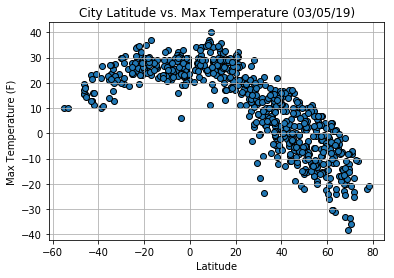

In [9]:
# Generate scatter plot for latitude vs max temp
latitudes = city_weather_df['Lat']
maximum_temps = city_weather_df['Max Temp']
plt.scatter(latitudes, maximum_temps, edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (03/05/19)')
plt.savefig('latitude_max_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (03/05/19)')

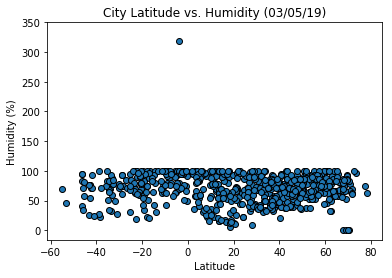

In [10]:
# Generate scatter plot for latitude vs humidity
latitudes = city_weather_df['Lat']
humidity = city_weather_df['Humidity']
plt.scatter(latitudes, humidity, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.yticks(np.arange(0, 400, step=50))
plt.title('City Latitude vs. Humidity (03/05/19)')


In [11]:
# After taking a look at the initial plot, there seemed to be an outlier point
# Identify the outlier
humidity_outlier = city_weather_df.loc[city_weather_df['Humidity'] > 100]
humidity_outlier

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
230,iquitos,40.0,PE,1551805200,319.0,-3.75,-73.25,6.0,2.6


In [12]:
# Make new dataframe that has cities only with humidity <= 100%
city_weather_df2 = city_weather_df[city_weather_df['Humidity'] <= 100]
city_weather_df2.loc[city_weather_df2['Humidity'] > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


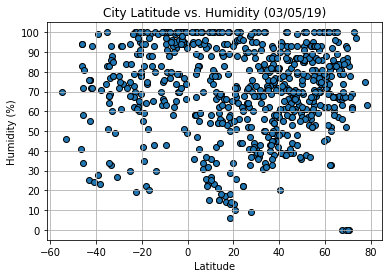

In [13]:
# Replot the data for new dataframe
latitudes2 = city_weather_df2['Lat']
humidity = city_weather_df2['Humidity']
plt.scatter(latitudes2, humidity, edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.yticks(np.arange(0, 110, step=10))
plt.title('City Latitude vs. Humidity (03/05/19)')
plt.savefig('latitude_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

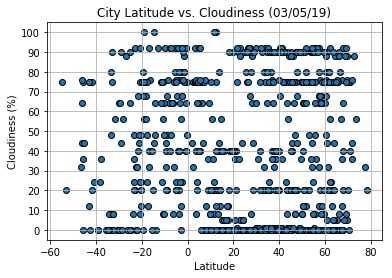

In [14]:
# Generate plot for latitude vs cloudiness
latitudes = city_weather_df['Lat']
cloudiness = city_weather_df['Cloudiness']
plt.scatter(latitudes, cloudiness, edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.yticks(np.arange(0, 110, step=10))
plt.title('City Latitude vs. Cloudiness (03/05/19)')
plt.savefig('latitude_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

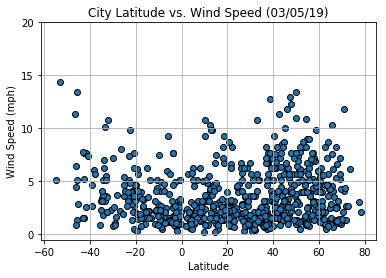

In [15]:
# Generate plot for latitude vs cloudiness
latitudes = city_weather_df['Lat']
wind_speed = city_weather_df['Wind Speed']
plt.scatter(latitudes, wind_speed, edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.yticks(np.arange(0, 25, step=5))
plt.title('City Latitude vs. Wind Speed (03/05/19)')
plt.savefig('latitude_wind_speed.png')
plt.show()